<a href="https://colab.research.google.com/github/MINED30/AI-python-connect/blob/master/ds_cs_N424a_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / Assignment 4*

---
# N414. 신경망과 학습에 관련된 파라미터 튜닝 (HyperTune)



## 실전 연습과제

다음 통신사 고객 이탈(Churn) 데이터셋에서 정확도를 조정해보는 파라미터 학습을 진행해보겠습니다 : [다운로드](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/telecom/TelcomCustomer.csv)

## 진행방식

- 데이터를 다운로드 받고 읽어옴(load)
- 데이터 클리닝을 진행 (필수는 아니지만 추천)
- Keras MLP model을 만들고, 학습 진행
- Hyperparameter 튜닝 진행:
 - batch_size
 - training epochs
 - optimizer
 - learning rate (optimizer에 따라서 해당되면)
 - momentum (optimizer에 따라서 해당되면)
 - activation functions
 - network weight initialization
 - dropout regularization
 - number of neurons in the hidden layer
 
하이퍼 파라미터의 초기 패스를 위해 그리드 검색 및 교차 검증을 사용할 수 있어야 합니다. 

실제 큰 통신회사의 데이터이기 때문에 최대한 정확하게 파악해 보십시오! 


# 데이터 전처리 

### 문항 1) 내 로컬 파일을 colab에 업로드하기

충분한 GPU를 가지고 있다면, 쉽게 문제를 해결할 수 있겠지만, 제한된 자원에서 충분한 GPU를 제공받지 못할 지 모릅니다. 이럴 때에는 딥러닝 커뮤니티에 물어볼 수도 있겠지만, 가성비 좋은 Colab의 GPU를 이용해서 실제 GPU사용량을 예측할 수 있다면 좋겠습니다. 모델 파라미터의 개수와 batch size 등이 GPU메모리에 큰 영향을 미치니 여러가지로 활용해보시기 바랍니다.

Colab의 GPU를 이용하기 위해서, 로컬로 진행하시던 분들도 이번에는 colab을 사용해봅시다. 

- 구글에서 colab의 라이브러리를 찾아서 업로드하세요. 
이후에 Pandas를 이용하여 데이터프레임으로 저장합니다.

colab을 사용하기위해서는 colab 라이브러리들을 잘 활용할 수 있으면 좋습니다. colab 기본형의 GPU의 사용제한 때문에 하지 못하는 일이 있다면, colab pro를 사용할 수 있습니다. 코드스테이츠에서 제공하는 colab pro 설치 가이드가 있지만, 스스로 문제를 해결해보시면 좋습니다. 그러나 도움이 필요하시면 HelpDesk에 문의해주시기 바랍니다.

### 로컬 파일을 업로드하는 코드를 입력하세요. 

In [ ]:
##### Your Code Here #####
# 로컬 파일 업로드
from google.colab import files
file_uploaded = files.upload()

# 데이터 불러오기
import pandas as pd
df = pd.read_csv('TelcomCustomer.csv')

Saving TelcomCustomer.csv to TelcomCustomer.csv


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 문항 2) 결측치가 있는지 isnull()함수를 이용하여 확인하고 결과값을 입력하시오. 

In [ ]:
##### Your Code Here #####
# 결측치 확인
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 문항 3) dtypes를 이용해서 데이터 타입을 확인하고 아래 문제에 답하시오.

TotalCharges와 같이 중요한 타켓값이 숫자로 되어있어야 하는데, object로 되어있는 것을 확인하고 숫자형으로 바꿔주세요. <br>
숫자형이 아닌 결측치의 개수는 몇개인가요? 

In [ ]:
import numpy as np
df.TotalCharges.replace(' ',np.nan).isna().sum()

11

In [ ]:
##### Your Code Here #####
# 데이터 타입 확인
df.dtypes
# TotalCharges 숫자형으로 변환
df.TotalCharges = pd.to_numeric(df.TotalCharges.replace(' ',np.nan))
# 결측치 확인
df.isnull().sum()
# 결측치 드랍
df = df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# customerID 드랍
df = df.drop(columns='customerID')

In [ ]:
# Attributing No internet service to No
no_internet_feats = [ 'TechSupport','OnlineBackup', 'DeviceProtection','StreamingTV',
                 'OnlineSecurity','StreamingMovies']

for i in no_internet_feats:
    df[i] = df[i].replace({'No internet service':'No'})

# Attributing No phone service to No
df['MultipleLines']=df['MultipleLines'].replace({'No phone service':'No'})

# Attributing No phone service to No
df['SeniorCitizen']=df['SeniorCitizen'].replace({0:'No',
                                                 1:'Yes'})

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 5.7MB/s 


In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
# 원핫 인코딩
from category_encoders import OrdinalEncoder

encoder = OrdinalEncoder()
df_encoded = encoder.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,29.85,29.85,1
1,2,1,2,1,34,2,1,1,2,2,2,1,1,1,2,2,2,56.95,1889.50,1
2,2,1,2,1,2,2,1,1,2,1,1,1,1,1,1,1,2,53.85,108.15,2
3,2,1,2,1,45,1,1,1,2,2,2,2,1,1,2,2,3,42.30,1840.75,1
4,1,1,2,1,2,2,1,2,1,2,1,1,1,1,1,1,1,70.70,151.65,2


In [ ]:
# 타겟을 0과 1로 바꿔주기
df_encoded['Churn'] = df_encoded['Churn'].replace({1: 0, 2: 1})
df_encoded['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
df_encoded.shape

(7032, 20)

### 문항 4) 훈련집합과 테스트 집합을 나누는 코드를 만들고, 해당 코드를 입력하시오.

- random_state=1
- test_size=0.25

In [ ]:
##### Your Code Here #####
# 훈련, 테스트 셋을 나누기
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_encoded, test_size=0.25, stratify=df_encoded['Churn'], random_state=1)
train.shape, test.shape

((5274, 20), (1758, 20))

In [ ]:
# features 와 target 을 분리

target = 'Churn'
features = df_encoded.drop(columns=[target]).columns

X_train = train[features]
X_test = test[features]

y_train = train[target]
y_test = test[target]

### 문항 5) sklearn.preprocessing.StandardScaler를 이용하여 정규화를 진행하시고, 문제를 보고 빈칸에 알맞은 단어를 넣으시오.

`X_train_scaled = scaler.##### Your Code Here #####`

In [ ]:
##### Your Code Here #####
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 19x1 형태 => 입력층의 노드수가 19개! 
X_train_scaled[0]

array([ 0.99508225, -0.43925252,  0.96350214, -0.65400354, -0.09779796,
        0.32541085,  1.16743446, -1.19019364,  1.59286639,  0.72650531,
       -0.72042294, -0.64249881, -0.79264136,  1.25707392, -0.83276144,
       -0.83448511, -0.27868378, -0.00881575, -0.17257846])

# 모델링

## 기본 모델

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import keras
import tensorflow as tf
import IPython
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 71kB 4.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=aa3764217e4ee8f4f9b51c8a8201dddac02ce54131d8451b1d6c7beb469b750b
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=9a3a99f28944009700fcd772605150f084d1348d10b10a45c8382b2f3b406225
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


### 문제 6. np.unique를 이용해서 y_train의 Class 의 개수를 확인하고 입력하시오.

In [ ]:
##### Your Code Here #####
np.unique(y_train)
# 이진분류의 경우 class는 2개이지만, 출력층의 노드수 = 1 

array([0, 1])

In [ ]:
# 간단한 모델 만들어서 성능을 보기 !
tf.random.set_seed(7)

model2 = Sequential()
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid')) # 00분류니까 노드수 1, 활성함수로는 시그모이드

model2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

results = model2.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled,y_test))

Epoch 1/10
165/165 [==============================] - 2s 5ms/step - loss: 0.5154 - accuracy: 0.7276 - val_loss: 0.4491 - val_accuracy: 0.7912
Epoch 2/10
165/165 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8054 - val_loss: 0.4461 - val_accuracy: 0.7986
Epoch 3/10
165/165 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8073 - val_loss: 0.4482 - val_accuracy: 0.7918
Epoch 4/10
165/165 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8095 - val_loss: 0.4452 - val_accuracy: 0.8020
Epoch 5/10
165/165 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.8119 - val_loss: 0.4512 - val_accuracy: 0.7947
Epoch 6/10
165/165 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8207 - val_loss: 0.4527 - val_accuracy: 0.7901
Epoch 7/10
165/165 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8156 - val_loss: 0.4520 - val_accuracy: 0.7958
Epoch 

In [ ]:
# 테스트셋 사용해서 결과 보기
model2.evaluate(X_test_scaled,  y_test, verbose=2) 

55/55 - 0s - loss: 0.4638 - accuracy: 0.7810


[0.46377870440483093, 0.7810011506080627]

파라미터 튜닝을 하기전에 간단히 임의로 넣어본 결과도 꽤 좋다. 이젠 GridSearchCV 를 사용해서 튜닝을 해보겠음!



## GridSearchCV 사용

In [ ]:
# 모델 만들기
tf.random.set_seed(7)

def model_builder(nodes=16, activation='relu'):

  model = Sequential()
  model.add(Dense(nodes, activation=activation))
  model.add(Dense(nodes, activation=activation))
  model.add(Dense(1, activation='sigmoid')) # 이진분류니까 노드수 1, 활성함수로는 시그모이드

  model.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

  return model

# keras.wrapper를 활용하여 분류기를 만듭니다
model = KerasClassifier(build_fn=model_builder, verbose=0)

# GridSearch
batch_size = [50, 100, 300]
epochs = [10, 20, 30]
nodes = [64, 128, 256]
activation = ['relu', 'sigmoid']
param_grid = dict(batch_size=batch_size, epochs=epochs, nodes=nodes, activation=activation)


# GridSearch CV를 만들기
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
grid_result = grid.fit(X_train_scaled, y_train, verbose=2)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] activation=relu, batch_size=50, epochs=10, nodes=64 .............
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


71/71 - 1s - loss: 0.4941 - accuracy: 0.7491
Epoch 2/10
71/71 - 0s - loss: 0.4235 - accuracy: 0.7929
Epoch 3/10
71/71 - 0s - loss: 0.4118 - accuracy: 0.7986
Epoch 4/10
71/71 - 0s - loss: 0.4067 - accuracy: 0.8035
Epoch 5/10
71/71 - 0s - loss: 0.3993 - accuracy: 0.8066
Epoch 6/10
71/71 - 0s - loss: 0.3976 - accuracy: 0.8057
Epoch 7/10
71/71 - 0s - loss: 0.3927 - accuracy: 0.8097
Epoch 8/10
71/71 - 0s - loss: 0.3883 - accuracy: 0.8129
Epoch 9/10
71/71 - 0s - loss: 0.3844 - accuracy: 0.8137
Epoch 10/10
71/71 - 0s - loss: 0.3827 - accuracy: 0.8214
[CV]  activation=relu, batch_size=50, epochs=10, nodes=64, total=   1.8s
[CV] activation=relu, batch_size=50, epochs=10, nodes=64 .............
Epoch 1/10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 17/30
36/36 - 0s - loss: 0.3759 - accuracy: 0.8259
Epoch 18/30
36/36 - 0s - loss: 0.3737 - accuracy: 0.8279
Epoch 19/30
36/36 - 0s - loss: 0.3721 - accuracy: 0.8254
Epoch 20/30
36/36 - 0s - loss: 0.3689 - accuracy: 0.8265
Epoch 21/30
36/36 - 0s - loss: 0.3672 - accuracy: 0.8305
Epoch 22/30
36/36 - 0s - loss: 0.3641 - accuracy: 0.8305
Epoch 23/30
36/36 - 0s - loss: 0.3621 - accuracy: 0.8348
Epoch 24/30
36/36 - 0s - loss: 0.3603 - accuracy: 0.8325
Epoch 25/30
36/36 - 0s - loss: 0.3578 - accuracy: 0.8359
Epoch 26/30
36/36 - 0s - loss: 0.3549 - accuracy: 0.8330
Epoch 27/30
36/36 - 0s - loss: 0.3547 - accuracy: 0.8348
Epoch 28/30
36/36 - 0s - loss: 0.3528 - accuracy: 0.8379
Epoch 29/30
36/36 - 0s - loss: 0.3477 - accuracy: 0.8416
Epoch 30/30
36/36 - 0s - loss: 0.3464 - accuracy: 0.8385
[CV]  activation=relu, batch_size=100, epochs=30, nodes=64, total=   2.4s
[CV] activation=relu, batch_size=100, epochs=30, nodes=64 ............
Epoch 1/30
36/36 - 1s

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:  6.7min finished


106/106 - 1s - loss: 0.5633 - accuracy: 0.7137
Epoch 2/30
106/106 - 0s - loss: 0.4602 - accuracy: 0.7700
Epoch 3/30
106/106 - 0s - loss: 0.4293 - accuracy: 0.7967
Epoch 4/30
106/106 - 0s - loss: 0.4230 - accuracy: 0.7969
Epoch 5/30
106/106 - 0s - loss: 0.4190 - accuracy: 0.8000
Epoch 6/30
106/106 - 0s - loss: 0.4172 - accuracy: 0.8051
Epoch 7/30
106/106 - 0s - loss: 0.4148 - accuracy: 0.8013
Epoch 8/30
106/106 - 0s - loss: 0.4160 - accuracy: 0.8028
Epoch 9/30
106/106 - 0s - loss: 0.4138 - accuracy: 0.8058
Epoch 10/30
106/106 - 0s - loss: 0.4126 - accuracy: 0.8045
Epoch 11/30
106/106 - 0s - loss: 0.4140 - accuracy: 0.8038
Epoch 12/30
106/106 - 0s - loss: 0.4122 - accuracy: 0.8053
Epoch 13/30
106/106 - 0s - loss: 0.4127 - accuracy: 0.8041
Epoch 14/30
106/106 - 0s - loss: 0.4120 - accuracy: 0.8039
Epoch 15/30
106/106 - 0s - loss: 0.4115 - accuracy: 0.8022
Epoch 16/30
106/106 - 0s - loss: 0.4117 - accuracy: 0.8034
Epoch 17/30
106/106 - 0s - loss: 0.4111 - accuracy: 0.8049
Epoch 18/30
106/1

In [ ]:
# 최적의 결과값을 낸 파라미터를 출력합니다
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.806598424911499 using {'activation': 'sigmoid', 'batch_size': 50, 'epochs': 30, 'nodes': 64}
Means: 0.7974971334139506, Stdev: 0.007936460821706568 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 10, 'nodes': 64}
Means: 0.7935153444608053, Stdev: 0.004826685189366592 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 10, 'nodes': 128}
Means: 0.7921880880991617, Stdev: 0.0072001668697371235 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 10, 'nodes': 256}
Means: 0.7935153643290201, Stdev: 0.003968231834885048 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 20, 'nodes': 64}
Means: 0.7825180093447367, Stdev: 0.004966173464021692 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 20, 'nodes': 128}
Means: 0.7755024631818136, Stdev: 0.0161847048404196 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 20, 'nodes': 256}
Means: 0.7897231777509054, Stdev: 0.006339881198630848 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 30, 'nodes

### 문항 7) 최적의 결과를 낸 파라미터와 결과값을 입력하시오.

- batch_size :50
- epochs :30
- nodes :64
- activation :sigmoid

- 정답은 `[100, 100, 100], activation_name` 형태로 입력하시오.

'activation': 'sigmoid', 'batch_size': 100, 'epochs': 30, 'nodes': 128 가 최적으로 나왔다. 정확도는 약 0.80 

이젠 Keras Tuner 를 사용한 파라미터 튜닝도 해보겠음!

## Keras Tuner 사용

In [ ]:
# 모델 만들기

def model_builder(hp):

  model = Sequential()

  # Dense layer에서 노드 수를 조정(32-512)
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)

  model.add(Dense(units = hp_units, activation='relu'))
  model.add(Dense(units = hp_units, activation='relu'))

  model.add(Dense(1, activation='sigmoid')) # 이진분류니까 노드수 1, 활성함수로는 시그모이드

  # Optimizer의 학습률(learning rate)을 조정[0.01, 0.001, 0.0001]합니다. 
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  # 컴파일 단계, 옵티마이저와 손실함수, 측정지표를 연결해서 계산 그래프를 구성함
  model.compile(optimizer=keras.optimizers.Adam(learning_rate = hp_learning_rate), 
                loss=keras.losses.BinaryCrossentropy(from_logits = True), 
                metrics=['accuracy'])

  return model

In [ ]:
# 튜너를 인스턴스화하고 하이퍼 튜닝을 수행

tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 30, 
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')

In [ ]:
# callback 정의 : 하이퍼 파라미터 검색을 실행하기 전에 모든 교육 단계가 끝날 때마다 교육 출력을 지우도록 콜백을 정의합니다.

class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
tuner.search(X_train_scaled, y_train, epochs = 30, batch_size=50, validation_data = (X_test_scaled,y_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
최적화된 Dense 노드 수 : {best_hps.get('units')} 
최적화된 Learning Rate : {best_hps.get('learning_rate')} 
""")

Trial 66 Complete [00h 00m 03s]
val_accuracy: 0.796928346157074

Best val_accuracy So Far: 0.806598424911499
Total elapsed time: 00h 02m 32s
INFO:tensorflow:Oracle triggered exit

최적화된 Dense 노드 수 : 480 
최적화된 Learning Rate : 0.001 



### 문항 8) Keras 튜너를 활용하여 얻어낸 파라미터를 입력하시오. 

- 정답은 `[100, 100]` 형태로 입력하시오.

In [ ]:
# 찾은 파라미터들로 모델 만들어보기 (Dense 노드 수 : 416, Learning Rate : 0.01, batch_size : 100, epochs : 30)
from tensorflow.keras import regularizers

tf.random.set_seed(1442)
initializer = tf.keras.initializers.HeNormal()

model = Sequential()

model.add(Dense(best_hps.get('units'), 
                activation='relu', kernel_initializer=initializer,          
                kernel_regularizer=regularizers.l2(0.01),    # L2 norm regularization
                activity_regularizer=regularizers.l1(0.01))) # L1 norm regularization))
model.add(Dense(best_hps.get('units'),
                activation='relu', kernel_initializer=initializer,            
                kernel_regularizer=regularizers.l2(0.01),    # L2 norm regularization
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(1, activation='sigmoid')) # 이진분류니까 노드수 1, 활성함수로는 시그모이드

model.compile(optimizer=keras.optimizers.Adam(learning_rate = best_hps.get('learning_rate')), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

results = model.fit(X_train_scaled, y_train, epochs=2, batch_size=50, validation_data=(X_test_scaled,y_test))

Epoch 1/2
106/106 [==============================] - 2s 9ms/step - loss: 19.2499 - accuracy: 0.7540 - val_loss: 9.6976 - val_accuracy: 0.7958
Epoch 2/2
106/106 [==============================] - 1s 7ms/step - loss: 8.2346 - accuracy: 0.8011 - val_loss: 5.1291 - val_accuracy: 0.7986


In [ ]:
# 테스트셋 사용해서 결과 보기
model.evaluate(X_test_scaled,  y_test, verbose=2) 

55/55 - 0s - loss: 5.1291 - accuracy: 0.7986


[5.129117012023926, 0.7986348271369934]

# 도전과제

- 1) Random Search 하이퍼 매개 변수 튜닝 구현해보세요.
- 2) hyperos 또는 hyperopts를 이용해서 Bayesian Optimiation tuning 수행 [(링크)](https://https://github.com/maxpumperla/hyperas)
- 3) 기존에 진행했던 강의&프로젝트 데이터셋을 하이퍼 파라미터로 조정해보세요. 
- Cifar100을 이용한다면 90% 이상 달성목표! [참고자료](https://paperswithcode.com/sota/image-classification-on-cifar-100)
- 4) MLP 모델을 forward 와 backward(학습까지)를 처음부터 구현할 수 있는가?
- 5) 케라스에서 MLP 모델을 구현하고 교차 검증(CV)을 통해 하이퍼 파라미터를 조정할 수 있는가?



## 1) Random Search 하이퍼 매개 변수 튜닝 구현해보세요.

### build model

In [ ]:
def make_model_rscv(nodes=64, func='relu', rate=0.1, l2=0.01):
  model = Sequential()
  model.add(Dense(nodes,
                  activation='relu',
                  input_dim=X_train.shape[1]))
  model.add(Dense(256, activation=func))
  model.add(Dropout(rate))
  model.add(Dense(512, activation='relu',
            kernel_regularizer=regularizers.l2(l2)))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer = 'adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### Randomized Search CV

In [ ]:
tf.random.set_seed(1442)
param_grid = {'nodes': [32, 128, 256, 512],
              'func':['tanh', 'relu', 'sigmoid', 'softmax'],
              'rate':[0, 0.2, 0.5, 0.7],
              'l2':[0.001, 0.005, 0.01, 0.05, 0.1]}

model_rscv = KerasClassifier(build_fn=make_model_rscv, verbose=0)

grid_rscv = RandomizedSearchCV(
    estimator=model_rscv,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    verbose=3,
    n_jobs=1,
    random_state=12)
grid_result_rscv = grid_rscv.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] rate=0.7, nodes=512, l2=0.005, func=sigmoid .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  rate=0.7, nodes=512, l2=0.005, func=sigmoid, score=0.735, total=   3.5s
[CV] rate=0.7, nodes=512, l2=0.005, func=sigmoid .....................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV]  rate=0.7, nodes=512, l2=0.005, func=sigmoid, score=0.726, total=   0.9s
[CV] rate=0.7, nodes=512, l2=0.005, func=sigmoid .....................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.7, nodes=512, l2=0.005, func=sigmoid, score=0.770, total=   1.1s
[CV] rate=0.2, nodes=32, l2=0.001, func=relu .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=32, l2=0.001, func=relu, score=0.755, total=   0.9s
[CV] rate=0.2, nodes=32, l2=0.001, func=relu .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=32, l2=0.001, func=relu, score=0.754, total=   1.0s
[CV] rate=0.2, nodes=32, l2=0.001, func=relu .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=32, l2=0.001, func=relu, score=0.750, total=   1.0s
[CV] rate=0.2, nodes=256, l2=0.05, func=sigmoid ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=256, l2=0.05, func=sigmoid, score=0.735, total=   0.9s
[CV] rate=0.2, nodes=256, l2=0.05, func=sigmoid ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=256, l2=0.05, func=sigmoid, score=0.751, total=   0.9s
[CV] rate=0.2, nodes=256, l2=0.05, func=sigmoid ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=256, l2=0.05, func=sigmoid, score=0.741, total=   0.9s
[CV] rate=0.5, nodes=512, l2=0.001, func=sigmoid .....................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.5, nodes=512, l2=0.001, func=sigmoid, score=0.759, total=   1.0s
[CV] rate=0.5, nodes=512, l2=0.001, func=sigmoid .....................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.5, nodes=512, l2=0.001, func=sigmoid, score=0.754, total=   1.2s
[CV] rate=0.5, nodes=512, l2=0.001, func=sigmoid .....................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.5, nodes=512, l2=0.001, func=sigmoid, score=0.741, total=   0.9s
[CV] rate=0.2, nodes=128, l2=0.1, func=softmax .......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=128, l2=0.1, func=softmax, score=0.735, total=   0.9s
[CV] rate=0.2, nodes=128, l2=0.1, func=softmax .......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=128, l2=0.1, func=softmax, score=0.726, total=   0.9s
[CV] rate=0.2, nodes=128, l2=0.1, func=softmax .......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=128, l2=0.1, func=softmax, score=0.741, total=   0.9s
[CV] rate=0.2, nodes=256, l2=0.001, func=sigmoid .....................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=256, l2=0.001, func=sigmoid, score=0.765, total=   1.0s
[CV] rate=0.2, nodes=256, l2=0.001, func=sigmoid .....................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=256, l2=0.001, func=sigmoid, score=0.758, total=   0.9s
[CV] rate=0.2, nodes=256, l2=0.001, func=sigmoid .....................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=256, l2=0.001, func=sigmoid, score=0.769, total=   0.9s
[CV] rate=0.5, nodes=128, l2=0.05, func=sigmoid ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.5, nodes=128, l2=0.05, func=sigmoid, score=0.762, total=   1.3s
[CV] rate=0.5, nodes=128, l2=0.05, func=sigmoid ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.5, nodes=128, l2=0.05, func=sigmoid, score=0.759, total=   1.0s
[CV] rate=0.5, nodes=128, l2=0.05, func=sigmoid ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.5, nodes=128, l2=0.05, func=sigmoid, score=0.765, total=   0.9s
[CV] rate=0, nodes=512, l2=0.001, func=tanh ..........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0, nodes=512, l2=0.001, func=tanh, score=0.760, total=   0.9s
[CV] rate=0, nodes=512, l2=0.001, func=tanh ..........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0, nodes=512, l2=0.001, func=tanh, score=0.726, total=   0.9s
[CV] rate=0, nodes=512, l2=0.001, func=tanh ..........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0, nodes=512, l2=0.001, func=tanh, score=0.762, total=   0.9s
[CV] rate=0, nodes=512, l2=0.1, func=sigmoid .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0, nodes=512, l2=0.1, func=sigmoid, score=0.735, total=   0.9s
[CV] rate=0, nodes=512, l2=0.1, func=sigmoid .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0, nodes=512, l2=0.1, func=sigmoid, score=0.726, total=   1.0s
[CV] rate=0, nodes=512, l2=0.1, func=sigmoid .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0, nodes=512, l2=0.1, func=sigmoid, score=0.741, total=   1.2s
[CV] rate=0.7, nodes=256, l2=0.1, func=sigmoid .......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.7, nodes=256, l2=0.1, func=sigmoid, score=0.760, total=   0.9s
[CV] rate=0.7, nodes=256, l2=0.1, func=sigmoid .......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.7, nodes=256, l2=0.1, func=sigmoid, score=0.726, total=   0.9s
[CV] rate=0.7, nodes=256, l2=0.1, func=sigmoid .......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.7, nodes=256, l2=0.1, func=sigmoid, score=0.741, total=   0.9s
[CV] rate=0, nodes=128, l2=0.05, func=tanh ...........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0, nodes=128, l2=0.05, func=tanh, score=0.759, total=   0.9s
[CV] rate=0, nodes=128, l2=0.05, func=tanh ...........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0, nodes=128, l2=0.05, func=tanh, score=0.751, total=   0.9s
[CV] rate=0, nodes=128, l2=0.05, func=tanh ...........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0, nodes=128, l2=0.05, func=tanh, score=0.766, total=   1.0s
[CV] rate=0, nodes=32, l2=0.01, func=sigmoid .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0, nodes=32, l2=0.01, func=sigmoid, score=0.775, total=   1.2s
[CV] rate=0, nodes=32, l2=0.01, func=sigmoid .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0, nodes=32, l2=0.01, func=sigmoid, score=0.759, total=   0.9s
[CV] rate=0, nodes=32, l2=0.01, func=sigmoid .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0, nodes=32, l2=0.01, func=sigmoid, score=0.777, total=   1.0s
[CV] rate=0.5, nodes=128, l2=0.001, func=relu ........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.5, nodes=128, l2=0.001, func=relu, score=0.750, total=   0.9s
[CV] rate=0.5, nodes=128, l2=0.001, func=relu ........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.5, nodes=128, l2=0.001, func=relu, score=0.747, total=   0.9s
[CV] rate=0.5, nodes=128, l2=0.001, func=relu ........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.5, nodes=128, l2=0.001, func=relu, score=0.259, total=   1.0s
[CV] rate=0.2, nodes=128, l2=0.005, func=tanh ........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=128, l2=0.005, func=tanh, score=0.735, total=   0.9s
[CV] rate=0.2, nodes=128, l2=0.005, func=tanh ........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=128, l2=0.005, func=tanh, score=0.750, total=   1.2s
[CV] rate=0.2, nodes=128, l2=0.005, func=tanh ........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=128, l2=0.005, func=tanh, score=0.773, total=   0.9s
[CV] rate=0.7, nodes=512, l2=0.05, func=sigmoid ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.7, nodes=512, l2=0.05, func=sigmoid, score=0.735, total=   1.0s
[CV] rate=0.7, nodes=512, l2=0.05, func=sigmoid ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.7, nodes=512, l2=0.05, func=sigmoid, score=0.726, total=   1.0s
[CV] rate=0.7, nodes=512, l2=0.05, func=sigmoid ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.7, nodes=512, l2=0.05, func=sigmoid, score=0.741, total=   0.9s
[CV] rate=0.2, nodes=32, l2=0.001, func=tanh .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=32, l2=0.001, func=tanh, score=0.764, total=   0.9s
[CV] rate=0.2, nodes=32, l2=0.001, func=tanh .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=32, l2=0.001, func=tanh, score=0.726, total=   0.9s
[CV] rate=0.2, nodes=32, l2=0.001, func=tanh .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=32, l2=0.001, func=tanh, score=0.767, total=   0.9s
[CV] rate=0.2, nodes=256, l2=0.01, func=tanh .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=256, l2=0.01, func=tanh, score=0.761, total=   1.2s
[CV] rate=0.2, nodes=256, l2=0.01, func=tanh .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=256, l2=0.01, func=tanh, score=0.726, total=   1.1s
[CV] rate=0.2, nodes=256, l2=0.01, func=tanh .........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=256, l2=0.01, func=tanh, score=0.763, total=   1.0s
[CV] rate=0.2, nodes=512, l2=0.05, func=softmax ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=512, l2=0.05, func=softmax, score=0.735, total=   1.0s
[CV] rate=0.2, nodes=512, l2=0.05, func=softmax ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=512, l2=0.05, func=softmax, score=0.726, total=   1.0s
[CV] rate=0.2, nodes=512, l2=0.05, func=softmax ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=512, l2=0.05, func=softmax, score=0.741, total=   0.9s
[CV] rate=0.2, nodes=32, l2=0.005, func=softmax ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=32, l2=0.005, func=softmax, score=0.765, total=   0.9s
[CV] rate=0.2, nodes=32, l2=0.005, func=softmax ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=32, l2=0.005, func=softmax, score=0.768, total=   0.9s
[CV] rate=0.2, nodes=32, l2=0.005, func=softmax ......................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.2, nodes=32, l2=0.005, func=softmax, score=0.765, total=   1.2s
[CV] rate=0.7, nodes=32, l2=0.1, func=tanh ...........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.7, nodes=32, l2=0.1, func=tanh, score=0.759, total=   0.9s
[CV] rate=0.7, nodes=32, l2=0.1, func=tanh ...........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[CV]  rate=0.7, nodes=32, l2=0.1, func=tanh, score=0.751, total=   0.9s
[CV] rate=0.7, nodes=32, l2=0.1, func=tanh ...........................


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.0min finished


[CV]  rate=0.7, nodes=32, l2=0.1, func=tanh, score=0.762, total=   1.0s


### SCORE

In [ ]:
rs = pd.DataFrame(grid_result_rscv.cv_results_).sort_values(by='rank_test_score').head()
nodes=[]
func=[]
l2=[]
rate=[]
for ind in rs.index :
  nodes.append(rs.params[ind]['nodes'])
  func.append(rs.params[ind]['func'])
  l2.append(rs.params[ind]['l2'])
  rate.append(rs.params[ind]['rate'])
rs['nodes']=nodes
rs['func']=func
rs['l2']=l2
rs['rate']=rate
rs[['rank_test_score','nodes','func','l2','rate','split0_test_score',	'split1_test_score',	'split2_test_score',	'mean_test_score',	'std_test_score']]

,rank_test_score,nodes,func,l2,rate,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score
11,1,32,sigmoid,0.010,0.0,0.775313,0.758817,0.777019,0.770383,0.008208
18,2,32,softmax,0.005,0.2,0.764505,0.767918,0.765074,0.765832,0.001493
5,3,256,sigmoid,0.001,0.2,0.765074,0.757679,0.769056,0.763936,0.004714
6,4,128,sigmoid,0.050,0.5,0.761661,0.758817,0.764505,0.761661,0.002322
10,5,128,tanh,0.050,0.0,0.759386,0.750853,0.766212,0.758817,0.006283


## 2) hyperos 또는 hyperopts를 이용해서 Bayesian Optimiation tuning 수행

### 베이직 튜토리얼

In [ ]:
from hyperopt import tpe, hp, fmin

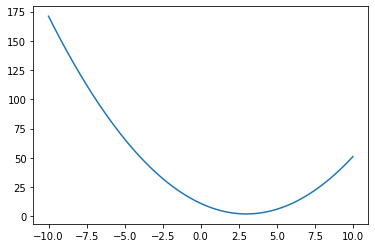

In [ ]:
objective = lambda x: (x-3)**2 + 2
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)
y = objective(x)

fig = plt.figure()
plt.plot(x, y)
plt.show() # 단순 2차함수인 loss function

In [ ]:
space = hp.uniform('x', -10, 10) # 가중치의 범위를 정해줌
best = fmin(
    fn=objective, # Objective Function to optimize
    space=space, # Hyperparameter's Search Space
    algo=tpe.suggest, # Optimization algorithm
    max_evals=1000 # Number of optimization attempts
)
print(best)

100%|██████████| 1000/1000 [00:07<00:00, 135.59it/s, best loss: 2.0000055138541843]
{'x': 2.997651840255765}


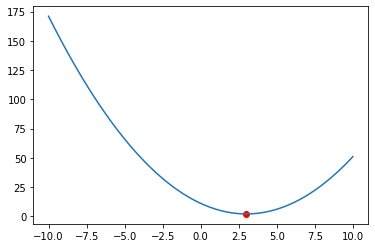

In [ ]:
fig = plt.figure()
plt.plot(x, y)
plt.scatter(best['x'], objective(best['x']), color='red')
plt.show() # 빨간점이 최적해

### Multiple Parameter Tutorial

In [ ]:
def objective(params):
    x, y = params['x'], params['y'] # 파라미터를 정해줌
    return np.sin(np.sqrt(x**2 + y**2)) # Lossfunction return

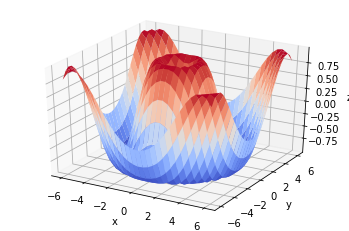

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
x, y = np.meshgrid(x, y)

z = objective({'x': x, 'y': y})

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show() # loss function을 3D로 표현

In [ ]:
space = {
    'x': hp.uniform('x', -6, 6),
    'y': hp.uniform('y', -6, 6)
} #범위 지정

In [ ]:
from hyperopt import tpe, hp, fmin

def f(params):
    x1, x2 = params['x1'], params['x2']
    if x1 == 'james':
        return -1 * x2
    if x1 == 'max':
        return 2 * x2
    if x1 == 'wansoo':
        return -3 * x2

search_space = {
    'x1': hp.choice('x1', ['james', 'max', 'wansoo']),
    'x2': hp.uniform('x2', 5, 10)
}

best = fmin(
    fn=f,
    space=search_space,
    algo=tpe.suggest,
    max_evals=100
)

print(best)


100%|██████████| 100/100 [00:00<00:00, 174.41it/s, best loss: -29.960242031314763]
{'x1': 2, 'x2': 9.986747343771588}


In [ ]:
def objective(params):
    x, y = params['x'], params['y'] # 파라미터를 정해줌
    return np.sin(np.sqrt(x**2 + y**2)) # Lossfunction return
space = {
    'x': hp.uniform('x', -6, 6),
    'y': hp.uniform('y', -6, 6)
} #범위 지정
best = fmin(
    fn=f,
    space=search_space,
    algo=tpe.suggest,
    max_evals=100
)

print(best)

### 어떻게 적용시킬것인가



hyperopt에서 제공하는 기능은 베이지안 기법을 이용해서 주어진 함수에대해 최소값을 찾을 수 있는 인자값을 찾아준다.

여기서 주어진 함수란 LOSS Function이고, 인자는 weight가 된다. 3번에서 적용시켜보자


## 3) 기존에 진행했던 강의&프로젝트 데이터셋을 하이퍼 파라미터로 조정해보세요.

In [ ]:
pip install hyperas

### build model

In [ ]:
# the usual imports for a vanilla nueral net
import keras
from keras.models import Sequential
from keras.layers import Dense

def create_model(x_train, y_train, x_test, y_test):
  model = Sequential()
  model.add(Dense({{choice([16, 256, 512, 1024])}}, input_shape=input_shape, activation='relu',name = 'input_layer'))
  model.add(Dense(16, activation='relu', name="hidden_layer"))
  model.add(Dense(10,activation='softmax',name="output_layer"))

  model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=["accuracy"])
  result = model.fit(X_train, y_train, batch_size={{choice([32, 64, 128])}}, epochs =3, validation_split=.15)

  validation_acc = np.amax(result.history['val_acc']) 
  print('Best validation acc of epoch:', validation_acc)
  return model

### bayes opt

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
from hyperopt import Trials, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
model = create_model(X_train,y_train,X_test,y_test)

best_run, best_model = optim.minimize(model=model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=5,
                                      trials=Trials(),
                                      notebook_name='simple_notebook')
X_train, Y_train, X_test, Y_test = data()
print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, Y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

CP949, notebook 오류나서 로컬에서 해결

## 4) MLP 모델을 forward 와 backward(학습까지)를 처음부터 구현할 수 있는가?

In [ ]:
from math import sqrt

### build network

In [ ]:
class MLP:
  ## 초기설정
  def __init__(self, input_nodes, hidden_nodes, output_nodes, lr):

    self.input_nodes = input_nodes # input layer
    self.hidden_nodes = hidden_nodes # hidden layer
    self.output_nodes = output_nodes # output layer
    self.lr = lr # learning rate

    # 가중치 랜덤으로 설정
    self.w_ih = np.random.normal(0,
                                 sqrt(2/(self.input_nodes + self.hidden_nodes)),
                                 (self.input_nodes, self.hidden_nodes))
    self.w_ho = np.random.normal(0,
                                 sqrt(2/(self.hidden_nodes + self.output_nodes)),
                                 (self.hidden_nodes, self.output_nodes))
    
  ## 활성함수
  def sigmoid(self, x):
    return 1/(1+np.exp(-x))

  # def relu(self, x):
  #   if x>0:
  #     return x
  #   else:
  #     return 0

  # def softmax(x):
	# e = exp(x)
	# return e / e.sum()

  ## fit
  def fit(self, X_train, y_train):
    self.inputs = X_train
    self.targets = y_train
    return self.forward('train') # 순전파 train으로보냄

  ## 순전파
  def forward(self, filter):
    if filter == 'train':
      self.h = np.dot(self.inputs, self.w_ih) # 가중치*input 
      self.H = self.sigmoid(self.h) # sigmoid(가중치*input)

      self.y = np.dot(self.H, self.w_ho) # 가중치*H
      self.Y = self.sigmoid(self.y) # sigmoid(가중치*H)

      return self.backward() # 역전파로보냄

    elif filter == 'pred':
      self.h = np.dot(self.inputs, self.w_ih)
      self.H = self.sigmoid(self.h)

      self.y = np.dot(self.H, self.w_ho)
      self.Y = self.sigmoid(self.y)
      return self.Y

  ## 역전파
  def backward(self):
    # 직전층(출력층>>은닉층)
    self.o_error = -(self.targets-self.Y) # 오차 ()
    self.o_delta = self.o_error * (self.Y * (1 - self.Y)) #오차*시그모이드의 미분 (직전층의 미분값)
    # 전전층(은닉층>>입력층)
    self.h_error = self.o_delta.dot(self.w_ho.T) # delta* 가중치
    self.h_delta = self.h_error * (self.y * (1 - self.y)) #오차*시그모이드의 미분 (전전층의 미분값)
    # 가중치는 동시에 업데이트(순차적업데이트 X)
    self.w_ih = self.w_ih - self.lr*self.inputs.T.dot(self.h_delta) #learning rate를 곱해서 값을 업데이트
    self.w_ho = self.w_ho - self.lr*self.H.T.dot(self.o_delta) #learning rate를 곱해서 값을 업데이트

  ## predict
  def predict(self, X_test):
    self.inputs = X_test

    y_pred = self.forward('pred')
    return y_pred

### DATA

In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[10], [20], [30]])

In [ ]:
mlp = MLP(2, 3, 1, 0.01)

### train 10 epoch

In [ ]:
# 초기 가중치
epoch = 10
print(f"학습전 가중치 : \n\t{mlp.w_ih.flatten()} \n\t{mlp.w_ho.flatten()}")
mlp.fit(a, b)
print(f"epochs {1} : \n\t{mlp.w_ih.flatten()} \n\t{mlp.w_ho.flatten()}")
for i in range(epoch):
  mlp.forward('train')
  print(f"epochs {i+1} : \n\t{mlp.w_ih.flatten()} \n\t{mlp.w_ho.flatten()}")

학습전 가중치 : 
	[ 0.62767208  0.57670703 -0.58969528 -0.27575651  0.08190298 -0.30976296] 
	[ 1.05735637  0.75393613 -0.24242345]
epochs 1 : 
	[ 0.37283193  0.39499611 -0.53126727 -0.58849959 -0.14109497 -0.23805936] 
	[ 1.12139311  0.83327323 -0.23645993]
epochs 1 : 
	[ 0.45706042  0.45758375 -0.54902791 -0.48050863 -0.06085017 -0.26083062] 
	[ 1.14706374  0.91850855 -0.22690772]
epochs 2 : 
	[ 0.37169452  0.38922721 -0.53214116 -0.58332003 -0.14317615 -0.24049287] 
	[ 1.18581532  1.00209757 -0.21907592]
epochs 3 : 
	[ 0.40779006  0.41973049 -0.53880971 -0.5357918  -0.10301144 -0.24927357] 
	[ 1.21056636  1.08221189 -0.21004278]
epochs 4 : 
	[ 0.33486619  0.35453863 -0.52615684 -0.62421507 -0.18205933 -0.23393144] 
	[ 1.23973666  1.16109978 -0.20190325]
epochs 5 : 
	[ 0.38366362  0.40024082 -0.53410398 -0.56167134 -0.12348277 -0.24411729] 
	[ 1.25928495  1.23375828 -0.19267201]
epochs 6 : 
	[ 0.28640941  0.30495802 -0.51922398 -0.681335   -0.24072075 -0.22580862] 
	[ 1.28390448  1.3078557

### Predict

In [ ]:
c = np.array([[10, 12]])

In [ ]:
mlp.predict(c)

array([[0.54829747]])

## 5) 케라스에서 MLP 모델을 구현하고 교차 검증(CV)을 통해 하이퍼 파라미터를 조정할 수 있는가?

### load data

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from keras.applications import VGG19
from tensorflow.keras.optimizers import Adam,SGD

batch_size = 128
num_classes = 100

# 데이터 불러오기
np.random.seed(1)
tf.random.set_seed(1)
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train = X_train / 255.0 
X_test = X_test / 255.0 


### build model

In [ ]:
def model_builder(hp):
  base_model_1 = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3), classes=y_train.shape[1])

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3])
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)

  model= Sequential()
  model.add(base_model_1) 
  model.add(Flatten()) 

  #Add the Dense layers along with activation and batch normalization
  model.add(Dense(1024,activation=('relu'),input_dim=512))
  model.add(Dense(512,activation=('relu'))) 
  model.add(Dense(256,activation=('relu'))) 
  model.add(Dropout(.3)) #Adding a dropout layer that will randomly drop /30% of the weights
  model.add(Dense(128,activation=('relu')))
  model.add(Dropout(.2))
  model.add(Dense(hp_units,activation=('relu')))
  model.add(Dense(num_classes,activation=('softmax'))) #This is the classification layer
  sgd=SGD(lr=hp_learning_rate,momentum=.9,nesterov=False)
  adam=Adam(lr=hp_learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

  model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  return model

### 5fold CV + Bayes

In [ ]:
import kerastuner
import numpy as np
from sklearn import model_selection
class CVTuner(kerastuner.engine.tuner.Tuner):
  def run_trial(self, trial, x, y, batch_size=32, epochs=1):
    cv = model_selection.KFold(5)
    val_losses = []
    for train_indices, test_indices in cv.split(x):
      x_train, x_test = x[train_indices], x[test_indices]
      y_train, y_test = y[train_indices], y[test_indices]
      model = self.hypermodel.build(trial.hyperparameters)
      model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
      val_losses.append(model.evaluate(x_test, y_test))
    self.oracle.update_trial(trial.trial_id, {'val_loss': np.mean(val_losses)})
    self.save_model(trial.trial_id, model)

In [ ]:
tuner = CVTuner(
  hypermodel=my_build_model,
  oracle=kerastuner.oracles.BayesianOptimization(
    objective='val_loss',
    max_trials=40))
tuner.search(X_train, y_train, batch_size=64, epochs=30)

In [ ]:
# RAM이 터져서 여기까지만하고, 어떻게하는지 알았다는 것에 의의를 두고 마치겠습니다.